In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd 
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error   

In [63]:
import os
path_andre = r"D:\SemuaMahasiswa\Andre"
path_irvan = r"D:\SemuaMahasiswa\Irvan"
path_jullius = r"D:\SemuaMahasiswa\Jullius"
path_peter = r"D:\SemuaMahasiswa\Peter"
path_yonathan = r"D:\SemuaMahasiswa\Yonathan"

fold_andre = os.listdir(path_andre)
fold_irvan = os.listdir(path_irvan)
fold_jullius = os.listdir(path_jullius)
fold_peter = os.listdir(path_peter)
fold_yonathan = os.listdir(path_yonathan)

print('Jumlah total gambar Andre:', len(fold_andre)) 
print('Jumlah total gambar Irvan:', len(fold_irvan)) 
print('Jumlah total gambar Jullius:', len(fold_jullius))
print('Jumlah total gambar Peter:', len(fold_peter)) 
print('Jumlah total gambar Yonathan:', len(fold_yonathan))              

Jumlah total gambar Andre: 20
Jumlah total gambar Irvan: 20
Jumlah total gambar Jullius: 20
Jumlah total gambar Peter: 25
Jumlah total gambar Yonathan: 25


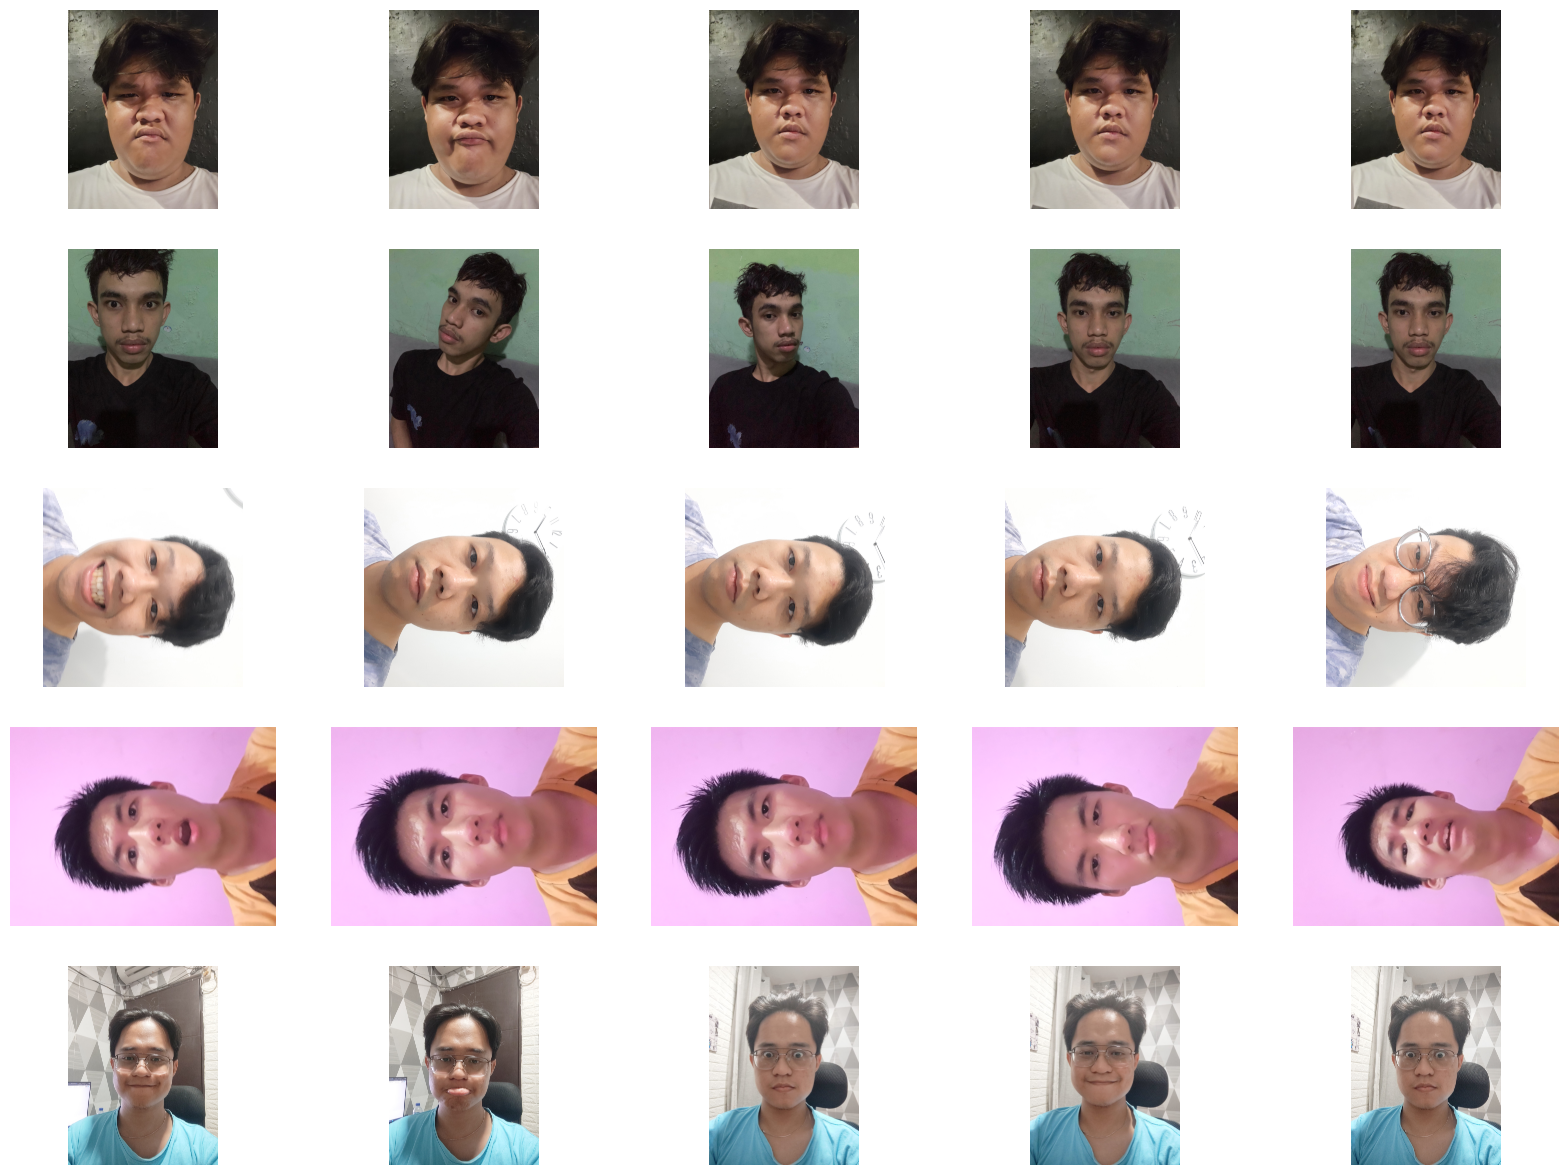

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt                                                     
import matplotlib.image as mpimg

nrows = 5
ncols = 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 5
gbr_tampil_andre = [os.path.join(path_andre, fname) for fname in fold_andre [pic_index - 5:pic_index]]
gbr_tampil_irvan = [os.path.join(path_irvan, fname) for fname in fold_irvan [pic_index - 5:pic_index]]
gbr_tampil_jullius = [os.path.join(path_jullius, fname) for fname in fold_jullius [pic_index - 5:pic_index]]
gbr_tampil_peter = [os.path.join(path_peter, fname) for fname in fold_peter [pic_index - 5:pic_index]]
gbr_tampil_yonathan = [os.path.join(path_yonathan, fname) for fname in fold_yonathan[pic_index - 5:pic_index]]

for i, img_path in enumerate(gbr_tampil_andre + gbr_tampil_irvan + gbr_tampil_jullius + gbr_tampil_peter + gbr_tampil_yonathan ):
    if i >= nrows * ncols:
        break
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [65]:
import tensorflow as tf                                                           
import keras_preprocessing                                                        
from keras_preprocessing import image                                             
from keras_preprocessing.image import ImageDataGenerator                          

In [66]:
BASIS_DIR = r"D:/SemuaMahasiswa/"
training_datagen = ImageDataGenerator(                                                           
      rescale = 1./255,    
      rotation_range=40,                                                                            
      width_shift_range=0.2,                                                                     
      height_shift_range=0.2,                                                                    
      shear_range=0.2,                                                                            
      zoom_range=0.2,                                                                             
      horizontal_flip=True,                                                                      
      fill_mode='nearest', 
      validation_split=0.2                                                                       
      )                

In [67]:
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150, 150),
    class_mode='categorical',  
    shuffle=True,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 84 images belonging to 5 classes.
Found 21 images belonging to 5 classes.


In [68]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if logs.get('val_accuracy') >= 0.90 and logs.get('accuracy') >= 0.90:
            print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
            self.model.stop_training = True

callbacks = myCallback()

In [69]:
model = tf.keras.models.Sequential([                                                  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),  
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             
    tf.keras.layers.MaxPooling2D(2,2),     
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             
    tf.keras.layers.MaxPooling2D(2,2),    
    tf.keras.layers.Flatten(),                                                        
    tf.keras.layers.Dropout(0.5),    
    tf.keras.layers.Dense(128, activation='relu'),                                   
    tf.keras.layers.Dense(512, activation='relu'),                                   
    tf.keras.layers.Dense(5, activation='softmax')                                
])

In [70]:
model.compile(loss = 'categorical_crossentropy',                                  
              optimizer='rmsprop',                                                
              metrics=['accuracy']) 

Epoch 1/100
2/2 - 16s - 8s/step - accuracy: 0.2308 - loss: 2.7417 - val_accuracy: 0.2857 - val_loss: 1.6339
Epoch 2/100
2/2 - 2s - 1s/step - accuracy: 0.2188 - loss: 1.5963 - val_accuracy: 0.2381 - val_loss: 1.5589
Epoch 3/100
2/2 - 13s - 7s/step - accuracy: 0.2500 - loss: 1.5810 - val_accuracy: 0.2381 - val_loss: 1.5318
Epoch 4/100
2/2 - 2s - 1s/step - accuracy: 0.2188 - loss: 1.5406 - val_accuracy: 0.2857 - val_loss: 1.4667
Epoch 5/100
2/2 - 13s - 6s/step - accuracy: 0.1923 - loss: 1.5827 - val_accuracy: 0.3810 - val_loss: 1.5191
Epoch 6/100
2/2 - 2s - 1s/step - accuracy: 0.4688 - loss: 1.5232 - val_accuracy: 0.5714 - val_loss: 1.4026
Epoch 7/100
2/2 - 13s - 6s/step - accuracy: 0.3750 - loss: 1.3691 - val_accuracy: 0.6667 - val_loss: 1.1387
Epoch 8/100
2/2 - 2s - 1s/step - accuracy: 0.3500 - loss: 1.2673 - val_accuracy: 0.2857 - val_loss: 2.1330
Epoch 9/100
2/2 - 13s - 6s/step - accuracy: 0.3846 - loss: 1.8968 - val_accuracy: 0.3333 - val_loss: 1.3362
Epoch 10/100
2/2 - 2s - 1s/step 

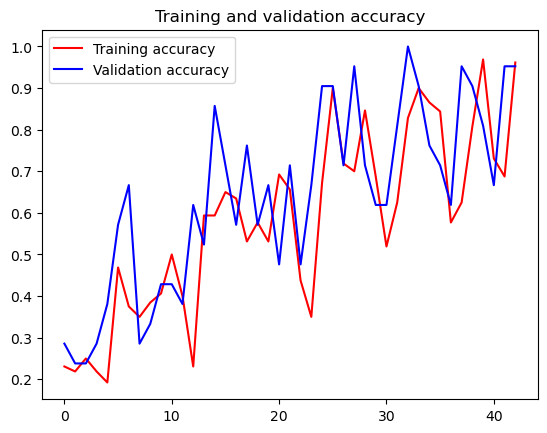

<Figure size 640x480 with 0 Axes>

Training Accuracy
Max: 0.96875
Min: 0.19230769574642181
Mean: 0.5799418580393458

Validation Accuracy
Max: 1.0
Min: 0.2380952388048172
Mean: 0.6423034453114798


In [71]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2,
    callbacks=[callbacks]
    )

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
Model: "sequential_4"

print("Training Accuracy")
print("Max:", max(history.history['accuracy']))
print("Min:", min(history.history['accuracy']))
print("Mean:", sum(history.history['accuracy'])/len(history.history['accuracy']))

print("\nValidation Accuracy")
print("Max:", max(history.history['val_accuracy']))
print("Min:", min(history.history['val_accuracy']))
print("Mean:", sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [72]:
print("Class indices:", train_generator.class_indices)

Class indices: {'Andre': 0, 'Irvan': 1, 'Jullius': 2, 'Peter': 3, 'Yonathan': 4}


In [73]:
model.save('face_model.h5')

In [77]:
import tensorflow as tf
import numpy as np
import cv2
import os
from keras.preprocessing import image

model = tf.keras.models.load_model('face_model.h5')

class_names = ['Andre', 'Irvan', 'Jullius', 'Peter', 'Yonathan']

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

absent_list = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        face = frame[y:y+h, x:x+w]
        
        face_img = cv2.resize(face, (150, 150))
        face_img = image.img_to_array(face_img)
        face_img = np.expand_dims(face_img, axis=0)
        face_img /= 255.0
        
        prediction = model.predict(face_img)
        class_idx = np.argmax(prediction)
        confidence = prediction[0][class_idx]
        
        if confidence < 0.5:
            class_name = "Tidak Terdeteksi"
        else:
            class_name = class_names[class_idx]

        cv2.putText(frame, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        if class_name in absent_list:
            print(f"{class_name} sudah absen.")
        elif class_name != "Tidak Terdeteksi":
            absent_list.add(class_name)
            print(f"{class_name} berhasil melakukan absensi.")
    
    cv2.imshow('Face Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Jullius berhasil melakukan absensi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Andre berhasil melakukan absensi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Jullius sudah absen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

absent_list = set()

while True:
    directory = input("Masukkan direktori tempat file berada atau ketik 'keluar' untuk keluar: ")

    if directory == 'keluar':
        break

    files = os.listdir(directory)

    for idx, file_name in enumerate(files, 1):
        print(f"{idx}. {file_name}")

    file_idx = int(input("Pilih nomor file yang ingin diprediksi atau ketik 'keluar' untuk keluar: ")) - 1
    if file_idx == -1:
        break

    file_name = files[file_idx]
    file_path = os.path.join(directory, file_name)

    img = image.load_img(file_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    names = ['Andre', 'Irvan', 'Jullius', 'Peter', 'Yonathan']
    predicted_name = names[np.argmax(classes)]

    print(file_name)
    if predicted_name in absent_list:
        print(f"{predicted_name} sudah absen.")
    else:
        absent_list.add(predicted_name)
        print(f"{predicted_name} berhasil melakukan absensi.")